In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
titanic_data = pd.read_csv('titanic.csv')

In [3]:
titanic_data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [4]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [5]:
print('Zero values in train name = ' + str(titanic_data['Name'].isnull().sum()))
print('Zero values in train sex = ' + str(titanic_data['Sex'].isnull().sum()))
print('Zero values in train cabin = ' + str(titanic_data['Cabin'].isnull().sum()))
print('Zero values in train embarked = ' + str(titanic_data['Embarked'].isnull().sum()))

Zero values in train name = 0
Zero values in train sex = 0
Zero values in train cabin = 687
Zero values in train embarked = 2


In [6]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Extract title out of name

In [7]:
for i in range(len(titanic_data)):
    if 'Mrs.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Mrs'
    elif 'Sir.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Royalty'
    elif 'Mr.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Mr'
    elif 'Capt.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Officer'
    elif 'Col.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Officer'
    elif 'Countess.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Royalty'
    elif 'Dona.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Royalty'
    elif 'Don.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Royalty'
    elif 'Dr.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Officer'
    elif 'Jonkheer.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Royalty'
    elif 'Lady.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Royalty'
    elif 'Major.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Officer'
    elif 'Master.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Master'
    elif 'Mlle.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Miss'
    elif 'Mme.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Mrs'
    elif 'Ms.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Mrs'
    elif 'Rev.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Officer'
    elif 'Miss.' in titanic_data['Name'][i]:
        titanic_data.loc[i,'Name'] = 'Miss'

# Fill in the small amount of missing values for fare

In [8]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

# Filling in missing values for age

In [9]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [10]:
age_selection = titanic_data[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Name', 'Sex']].dropna()
age_selection['Fare'] = age_selection['Fare'].astype(int)
grouped_age = age_selection.groupby(['Name','Pclass','Sex'])['Age'].median()
print(grouped_age)

Name     Pclass  Sex   
Master   1       male       4.0
         2       male       1.0
         3       male       4.0
Miss     1       female    30.0
         2       female    24.0
         3       female    18.0
Mr       1       male      40.0
         2       male      31.0
         3       male      26.0
Mrs      1       female    40.0
         2       female    31.5
         3       female    31.0
Officer  1       female    49.0
                 male      51.0
         2       male      46.5
Royalty  1       female    40.5
                 male      40.0
Name: Age, dtype: float64


In [11]:
for i in range(len(titanic_data)):
    if not titanic_data['Age'][i] > 0:
        if titanic_data.loc[i,'Name'] == 'Master':
            if titanic_data.loc[i,'Pclass'] == 1:
                titanic_data.loc[i,'Age'] = 6
            elif titanic_data.loc[i,'Pclass'] == 2:
                titanic_data.loc[i,'Age'] = 2
            elif titanic_data.loc[i,'Pclass'] == 3:
                titanic_data.loc[i,'Age'] = 6
        elif titanic_data.loc[i,'Name'] == 'Miss':
            if titanic_data.loc[i,'Pclass'] == 1:
                titanic_data.loc[i,'Age'] = 30
            elif titanic_data.loc[i,'Pclass'] == 2:
                titanic_data.loc[i,'Age'] = 21
            elif titanic_data.loc[i,'Pclass'] == 3:
                titanic_data.loc[i,'Age'] = 19
        elif titanic_data.loc[i,'Name'] == 'Mr':
            if titanic_data.loc[i,'Pclass'] == 1:
                titanic_data.loc[i,'Age'] = 40
            elif titanic_data.loc[i,'Pclass'] == 2:
                titanic_data.loc[i,'Age'] = 31
            elif titanic_data.loc[i,'Pclass'] == 3:
                titanic_data.loc[i,'Age'] = 29
        elif titanic_data.loc[i,'Name'] == 'Mrs':
            if titanic_data.loc[i,'Pclass'] == 1:
                titanic_data.loc[i,'Age'] = 43
            elif titanic_data.loc[i,'Pclass'] == 2:
                titanic_data.loc[i,'Age'] = 31
            elif titanic_data.loc[i,'Pclass'] == 3:
                titanic_data.loc[i,'Age'] = 34
        elif titanic_data.loc[i,'Name'] == 'Officer':
            if titanic_data.loc[i,'Pclass'] == 1:
                if titanic_data.loc[i,'Sex'] == 'female':
                    titanic_data.loc[i,'Age'] = 49
                elif titanic_data.loc[i,'Sex'] == 'male':
                    titanic_data.loc[i,'Age'] = 52
            elif titanic_data.loc[i,'Pclass'] == 2:
                titanic_data.loc[i,'Age'] = 42
        elif titanic_data.loc[i,'Name'] == 'Royalty':
            if titanic_data.loc[i,'Pclass'] == 1:
                if titanic_data.loc[i,'Sex'] == 'female':
                    titanic_data.loc[i,'Age'] = 39
                elif titanic_data.loc[i,'Sex'] == 'male':
                    titanic_data.loc[i,'Age'] = 40

# Extract cabin class out of cabin

In [12]:
for i in range(len(titanic_data)):
    if type(titanic_data['Cabin'][i]) == str:
        trimmed = titanic_data['Cabin'][i][:1]
        titanic_data.loc[i,'Cabin'] = trimmed

# Filling in missing values for cabin

In [13]:
cabin = titanic_data[['Cabin','SibSp','Parch','Age','Fare','Pclass']].dropna()
cabin['Fare'] = cabin['Fare'].astype(int)
grouped_cabin = cabin.groupby(['Cabin'])['Pclass'].mean()
print(grouped_cabin)

Cabin
A    1.000000
B    1.000000
C    1.000000
D    1.121212
E    1.312500
F    2.384615
G    3.000000
T    1.000000
Name: Pclass, dtype: float64


In [14]:
# Can be improved
classone = ['A', 'B', 'C', 'D', 'E', 'T']
for i in range(len(titanic_data)):
    if not type(titanic_data['Cabin'][i]) == str:
        if titanic_data.loc[i,'Pclass'] == 1:
            titanic_data.loc[i,'Cabin'] = random.choice(classone)
        elif titanic_data.loc[i,'Pclass'] == 2:
            titanic_data.loc[i,'Cabin'] = 'F'
        elif titanic_data.loc[i,'Pclass'] == 3:
            titanic_data.loc[i,'Cabin'] = 'G'

# Visualizations

In [15]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

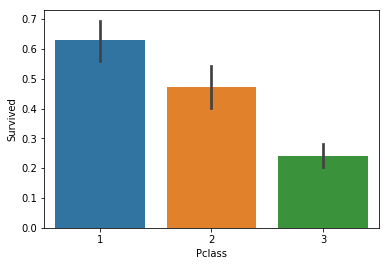

In [16]:
import seaborn as sns

sns.barplot(y=titanic_data['Survived'], x=titanic_data['Pclass'])

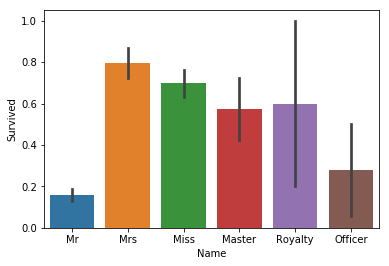

In [17]:
sns.barplot(y=titanic_data['Survived'], x=titanic_data['Name'])

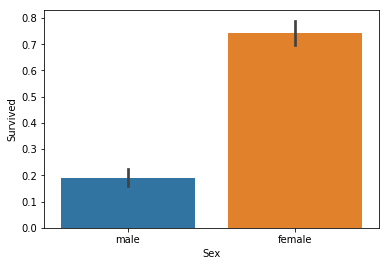

In [18]:
sns.barplot(y=titanic_data['Survived'], x=titanic_data['Sex'])

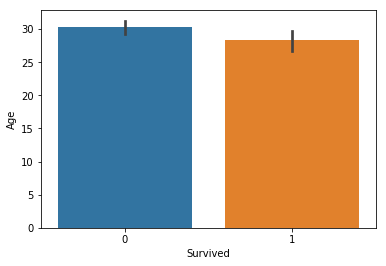

In [19]:
sns.barplot(x=titanic_data['Survived'], y=titanic_data['Age'])

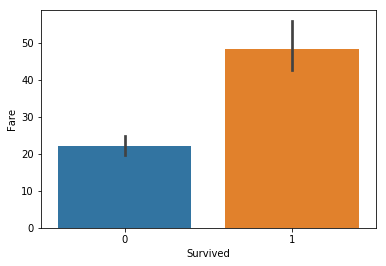

In [20]:
sns.barplot(x=titanic_data['Survived'], y=titanic_data['Fare'])

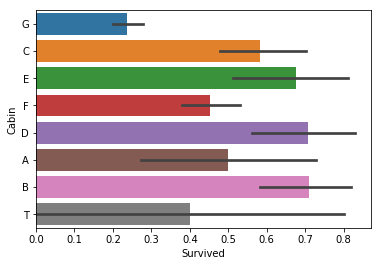

In [21]:
sns.barplot(x=titanic_data['Survived'], y=titanic_data['Cabin'])

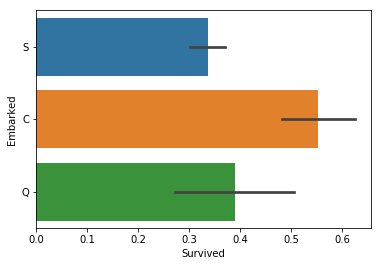

In [22]:
sns.barplot(x=titanic_data['Survived'], y=titanic_data['Embarked'])

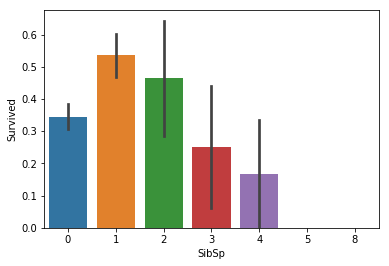

In [23]:
sns.barplot(y=titanic_data['Survived'], x=titanic_data['SibSp'])

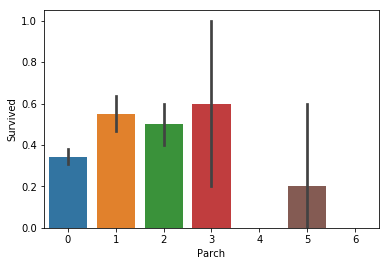

In [24]:
sns.barplot(y=titanic_data['Survived'], x=titanic_data['Parch'])

# SibSp + Parch into familysize

In [25]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.drop(['SibSp'], axis=1, inplace=True)
titanic_data.drop(['Parch'], axis=1, inplace=True)

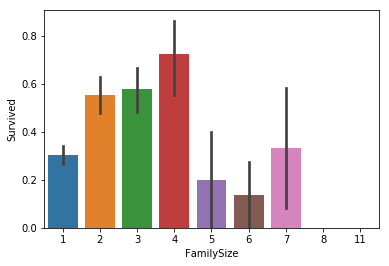

In [26]:
sns.barplot(y=titanic_data['Survived'], x=titanic_data['FamilySize'])

# Combine FamilySize 8 + 11 because both have 0 change of surviving

In [27]:
for i in range(len(train)):
    if titanic_data.loc[i,'FamilySize'] == 11:
        titanic_data.loc[i,'FamilySize'] = 8

NameError: name 'train' is not defined